<a href="https://colab.research.google.com/github/sarthakgupta/Deep-Learning-Hands-On/blob/master/CNN_HandsOn_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
mnist = keras.datasets.mnist

In [0]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("x_train:", x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
x_train1=x_train.reshape(60000,28,28,1)
x_test1=x_test.reshape(10000,28,28,1)

y_train1=keras.utils.to_categorical(y_train,10)
y_test1=keras.utils.to_categorical(y_test,10)
print("y_train_categorical:",y_train1.shape)
print("y_test_categorical:",y_test1.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)
y_train_categorical: (60000, 10)
y_test_categorical: (10000, 10)


In [0]:
Dropout_en=1

model = tf.keras.models.Sequential()  
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Flatten())
if(Dropout_en==1):
  model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['accuracy'])

#history=model.fit(x_train, y_train1, epochs=5)
history=model.fit(x_train1, y_train1, batch_size=1000, epochs=10, validation_data=(x_test1,y_test1))

test_result=model.evaluate(x_test1, y_test1)
print("Test Accuracy::",test_result[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.0232 - acc: 0.8365 - val_loss: 0.0080 - val_acc: 0.9492
Epoch 2/10
60000/60000 [==============================] - 5s 92us/sample - loss: 0.0070 - acc: 0.9563 - val_loss: 0.0042 - val_acc: 0.9735
Epoch 3/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0045 - acc: 0.9715 - val_loss: 0.0037 - val_acc: 0.9764
Epoch 4/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0034 - acc: 0.9782 - val_loss: 0.0040 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0028 - acc: 0.9822 - val_loss: 0.0029 - val_acc: 0.9816
Epoch 6/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0025 - acc: 0.9844 - val_loss: 0.0024 - val_acc: 0.9842
Epoch 7/10
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0022 - acc: 0.9863 - val_loss: 0.

array([[7, 2, 1, 0, 4, 1, 4, 9],
       [5, 9, 0, 6, 9, 0, 1, 5],
       [9, 7, 3, 4, 9, 6, 6, 5],
       [4, 0, 7, 4, 0, 1, 3, 1],
       [3, 4, 7, 2, 7, 1, 2, 1],
       [1, 7, 4, 2, 3, 5, 1, 2],
       [4, 4, 6, 3, 5, 5, 6, 0],
       [4, 1, 9, 5, 7, 8, 9, 3]])

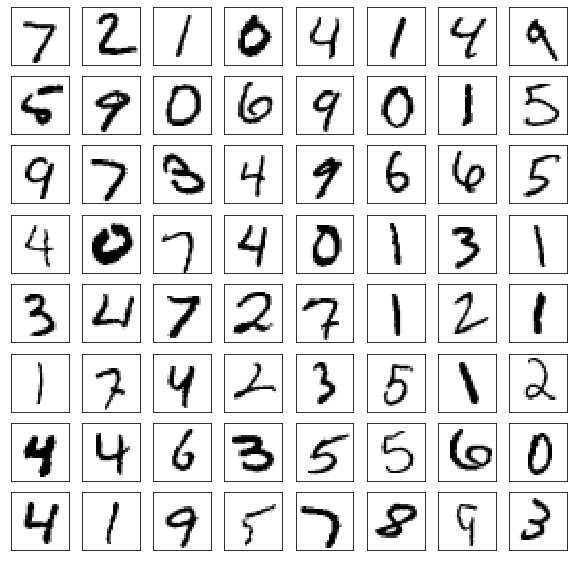

In [0]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)

predict_val=model.predict(x_test1)
predict_label=predict_val.argmax(axis=1)
predict_label[:64].reshape(8,8)


Text(0.5, 1.0, 'Accuracy Curves')

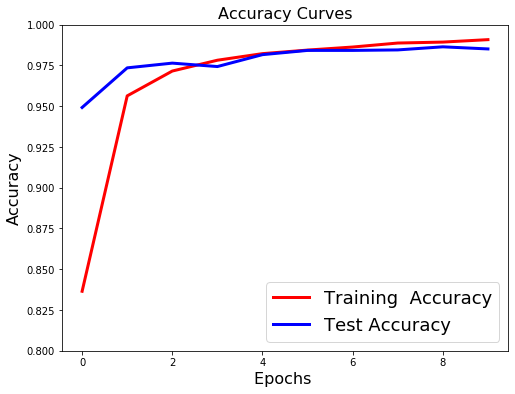

In [0]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training  Accuracy', 'Test Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.ylim((0.8,1))
plt.title('Accuracy Curves',fontsize=16)